# Байесовская статистика
## Задание B.2


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---

**Баллы за задание:**

* Задача 1 — 20 баллов
* Задача 2 — 60 баллов
* Задача 3 — 40 баллов
* Задача 4 — 30 баллов
* Задача 5 — 40 баллов
* Задача 6 — 25 баллов
---

In [ ]:
# Bot check

# HW_ID: ds_bs2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

--- 

### Задача 1

Дана выборка из распределения $Bern(\theta)$:

In [3]:
sample = np.array([1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0])

В качестве априорного на $\theta$ рассматривается треугольное распределение:

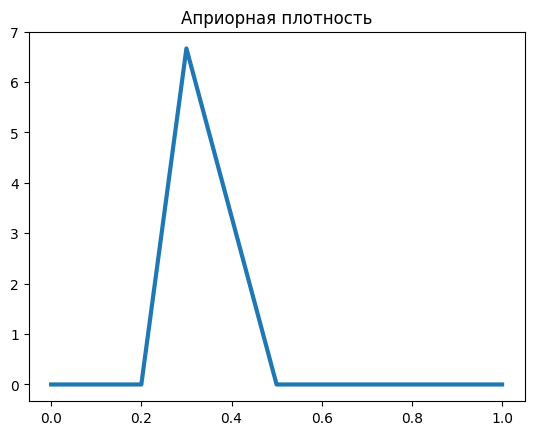

In [4]:
grid = np.linspace(0,1,1001)
dens = sps.triang(c=1/3, loc=0.2, scale=0.3).pdf(grid)  # наше q(t)
plt.plot(grid, dens, lw=3)
plt.title('Априорная плотность')
plt.show()

С помощью метода Монте-Карло постройте апостериорное распределение и найдите его математическое ожидание.

*Апостериорная плотность: $f(t|x) = q(t) \cdot p_t(x) = dens \cdot t^{\sum\limits^n x_i}(1-t)^{\sum\limits^n (1-x_i)}$*

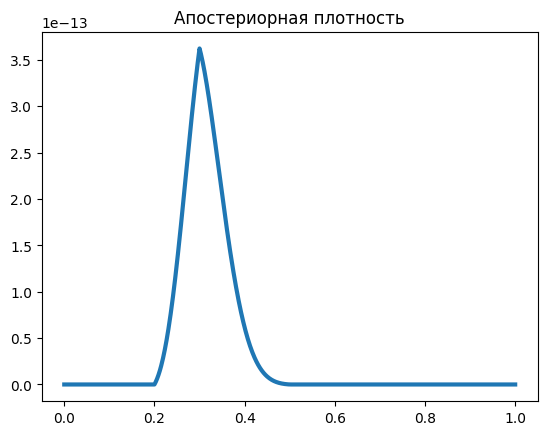

In [5]:
p_t = grid**sample.sum() * (1-grid)**((1-sample).sum())
plt.plot(grid, dens*p_t, lw=3)
plt.title('Апостериорная плотность')
plt.show()

*Монте-Карло:*

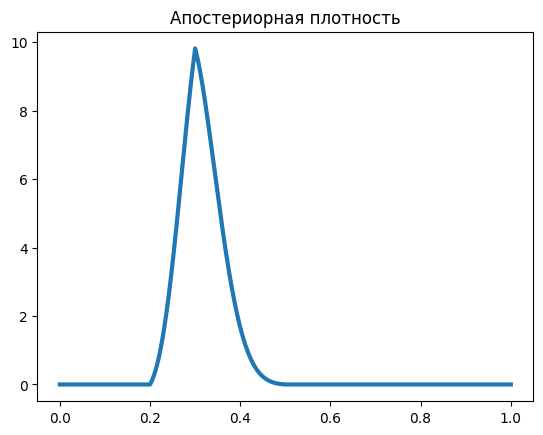

In [6]:
s = sps.uniform(0,1).rvs(10000)
f = sps.triang(c=1/3, loc=0.2, scale=0.3).pdf(s) * s**sample.sum() * (1-s)**(1-sample).sum()
assert np.abs((dens*p_t/f.mean()).sum()/1001 - 1) < 1e-1, 'не плотность (интеграл не равен 1)'
plt.plot(grid, dens*p_t/f.mean(), lw=3)
plt.title('Апостериорная плотность')
plt.show()

*Матож*

In [7]:
round((grid*dens*p_t/f.mean()).sum()/1001, 3)  # примерно треть

0.319

*В этой задаче удалось применить метод М-К для построения апостериорного распр.-я и поиска его мат. ож.-я*

__________________
### Задача 2

В качестве байесовского доверительного интервала обычно рассматривают *область наибольшей плотности* (HDR, high density region) апостериорного распределения. 

Если $q(t)$ &mdash; плотность некоторого распределения, то множество $A$ называется $\alpha$-HDR, если 
* для некоторой $c > 0$ выполнено $\forall x \in A: q(t) \geqslant c$ и $\forall x \notin A: q(t) < c$, то есть внутри $A$ плотность выше, чем вне $A$;
* вероятность события $A$ не меньше $\alpha$
$$\int\limits_A q(t) dt \geqslant \alpha.$$

Как и для доверительных интервалов, при возможности стоит рассматривать такое множество, на котором достигается равенство в последнем неравенстве.

На схеме ниже приведена двумодальная плотность и визуализированы 0.75-HDR, состоящая из двух интервалов, а также доверительные интервалы, построенные с помощью среднего и дисперсии, а также квантилей.

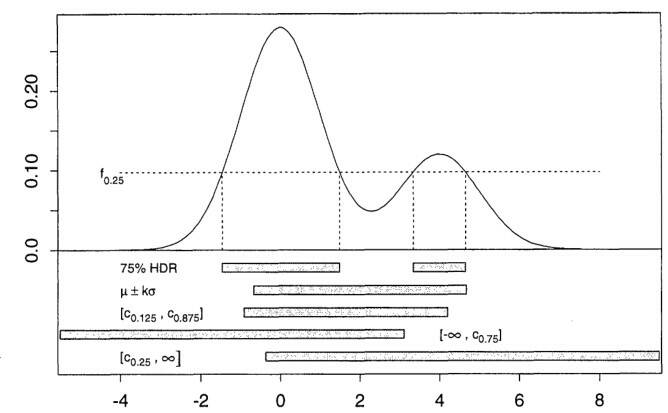


Напишите функцию, вычисляющую с некоторой точностью HDR для заданного распределения. Она должна уметь работать даже с распределениями, имеющими странные или неограниченные носители, а также с такими распределениями, про которые вообще мало что известно. Поэтому решение, где нужно заранее указывать область, на которой осуществляется поиск будет оценено в половину баллов. Можете считать, что у вас есть объект, у которого есть методы `pdf`, выдающий плотность в переданных точках и `rvs`, выдающий выборку заданного размера.

*Совет.* Для поиска $c$ используйте бинпоиск.

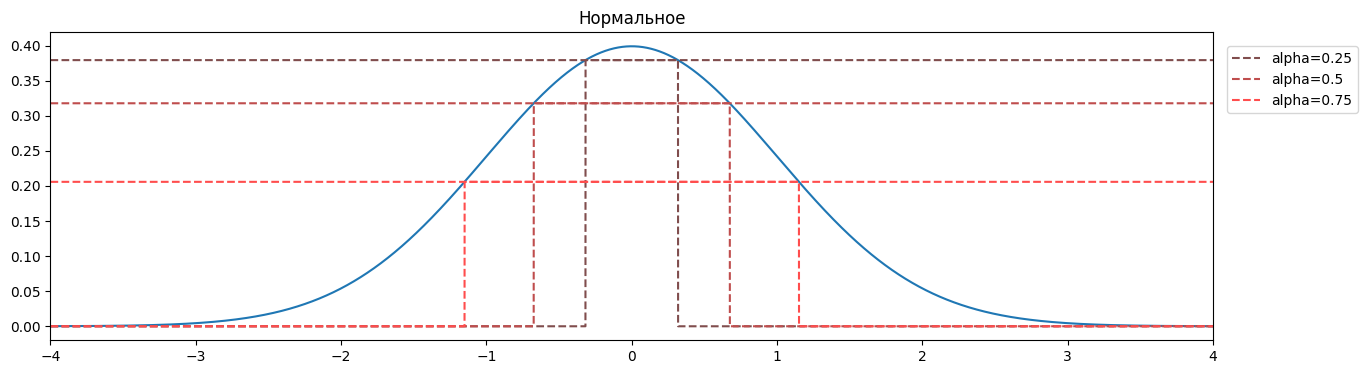

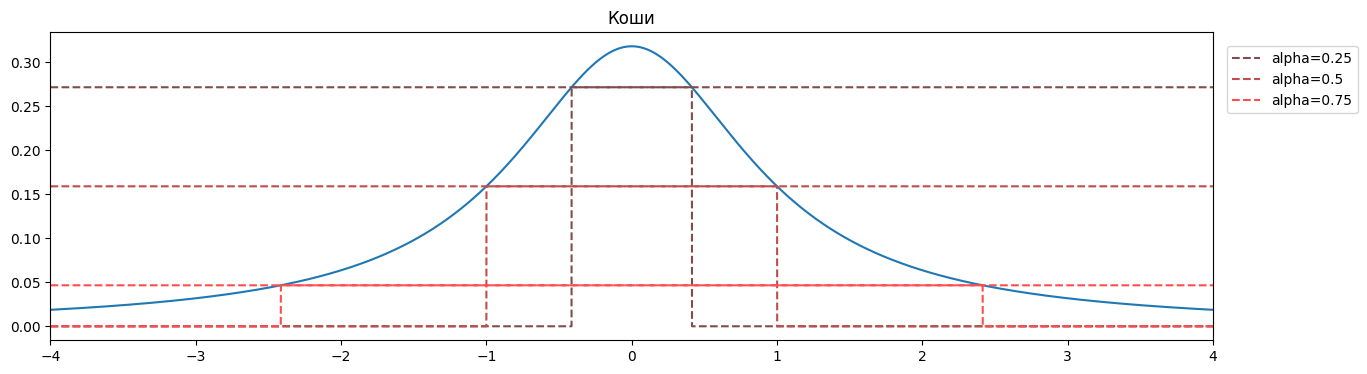

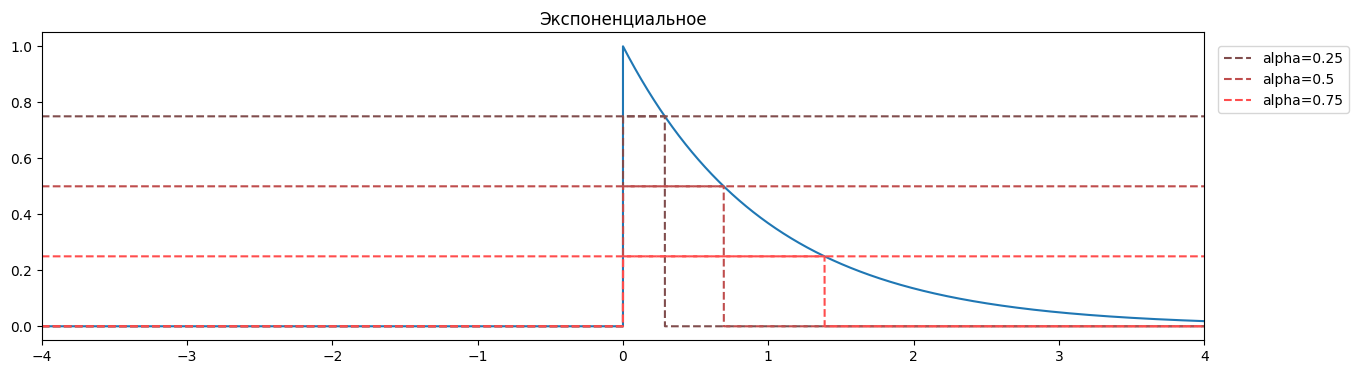

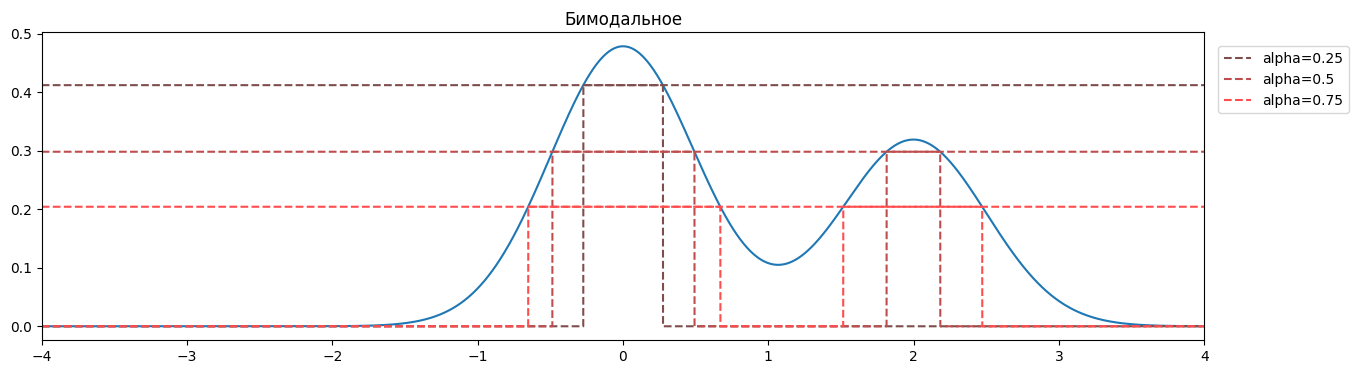

In [8]:
def hdr(dist, supp, eps=1e-4, alpha=0.95):
    samp = dist.rvs(int(2//eps))
    L, R = samp.min(), samp.max()
    dens = dist.pdf(np.linspace(L, R, int(1//eps)**2))
    lb, ub = dens.min(), dens.max()
    while eps < ub-lb:
        mid = (lb+ub)/2
        lb,ub = (mid,ub) if dens[dens>mid].sum()*(R-L)*eps**2 >= alpha else (lb,mid)
    return np.where(dist.pdf(supp)>=(lb+ub)/2, (lb+ub)/2, 0)

def draw(title, dist, supp = np.linspace(-4,4,100_000)):
    plt.figure(figsize=(15,4))
    plt.title(title)
    plt.plot(supp, dist.pdf(supp))
    for alpha in [0.25,0.5,0.75]:
        H = hdr(dist, supp, alpha=alpha)
        color = (alpha+0.25,0.3,0.3)
        plt.plot(supp, H, ls='--', color=color, label=f'{alpha=}')
        plt.plot(supp, np.ones_like(supp)*H.max(), ls='--', color=color)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), borderaxespad=1)
    plt.xlim((supp.min(),supp.max()))
    plt.show()

class Bimodal:
    A, B = sps.norm(0,0.5), sps.norm(2,0.5)
    def pdf(self, *args, **kwargs):
        return 0.6*self.A.pdf(*args, **kwargs) + 0.4*self.B.pdf(*args, **kwargs)
    def rvs(self, *args, **kwargs):
        return 0.6*self.A.rvs(*args, **kwargs) + 0.4*self.B.rvs(*args, **kwargs)

for title, dist in {'Нормальное':sps.norm(),'Коши':sps.cauchy(),'Экспоненциальное':sps.expon(),'Бимодальное':Bimodal()}.items():
    draw(title, dist)

*Итог: видно, что всё работает)*

__________________
### Задача 3

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $Bern(\theta)$. В качестве априорного на $\theta$ рассматривается сопряжённое распределение. Исследуйте влияние параметров априорного распределения на скорость сходимости к истинному значению параметра.

Для экспериментов используйте истинное значение $\theta=0.15$. В качестве скорости сходимости рассматривайте минимальное количество элементов выборки, необходимое для выполнения двух условий:
* $\theta$ принадлежит 0.95-HDR,
* 0.95-HDR достаточно узкий &mdash; его ширина не превосходит 0.01.

Учтите, что эксперименты имеют стохастический характер.

*Как сделать вывод.*
* Рекомендации вида "брать такое априорное, которое ближе к истинному значению параметра" некорректны, поскольку само истинное значение параметра не известно. Какую-либо рекомендацию вообще дать невозможно.
* Заключения вида "если мы угадаем правильное априорное, то сойдемся быстро" также некорректны. Если мы как-то можем угадать "правильное" априорное распределение, то почему бы сразу не угадывать значение параметра?
* Априорное распределение &mdash; наши знания или представления о природе явления до начала эксперимента. Они могут примерно совпадать с реальностью или сильно отличаться от неё. В первом случае достаточно небольшого количества наблюдений для подтверждения наших знаний, во втором &mdash; потребуется достаточно большое количество наблюдений для переубеждения. Кроме того, на количество наблюдений влияет также то, насколько мы уверенны в наших априорных знаниях. Ваша задача &mdash; охарактеризовать подобным образом параметры сопряжённого семейства распределений к бернуллиевскому семейству.


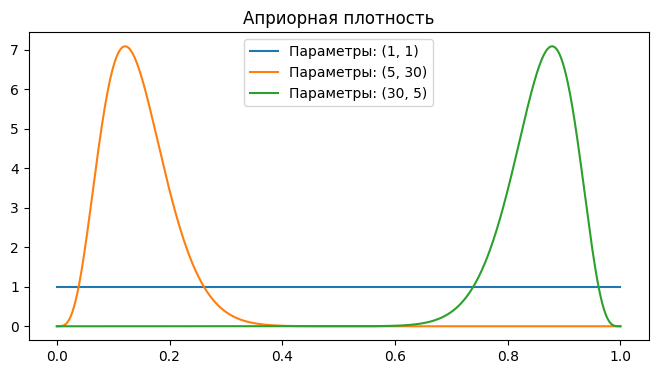

{(1, 1): 19593, (5, 30): 19544, (30, 5): 19704}

In [9]:
def convergence_rate(prior_alpha, prior_beta, theta=0.15):
    l,r = 19000,20000
    while 1 < r-l:
        mid = (l+r)//2
        res = []
        for _ in range(100):
            sample = sps.bernoulli(p=theta).rvs(size=mid)
            lb,ub = sps.beta(prior_alpha+sample.sum(), prior_beta+mid-sample.sum()).interval(0.95)  # hdr без велосипеда)
            res.append(lb <= theta <= ub and ub-lb <= 0.01)
        l,r = (l,mid) if np.sum(res)>50 else (mid,r)
    return r

params = [(1,1),(5,30),(30,5)]  # пара примеров (равномерный, близкий к реальности и далекий)

plt.figure(figsize=(8,4))
for p in params:
    plt.plot(np.linspace(0,1,1000), sps.beta(*p).pdf(np.linspace(0,1,1000)), label=f'Параметры: {p}')
plt.legend()
plt.title('Априорная плотность')
plt.show()

results = {p:convergence_rate(*p) for p in params}
results

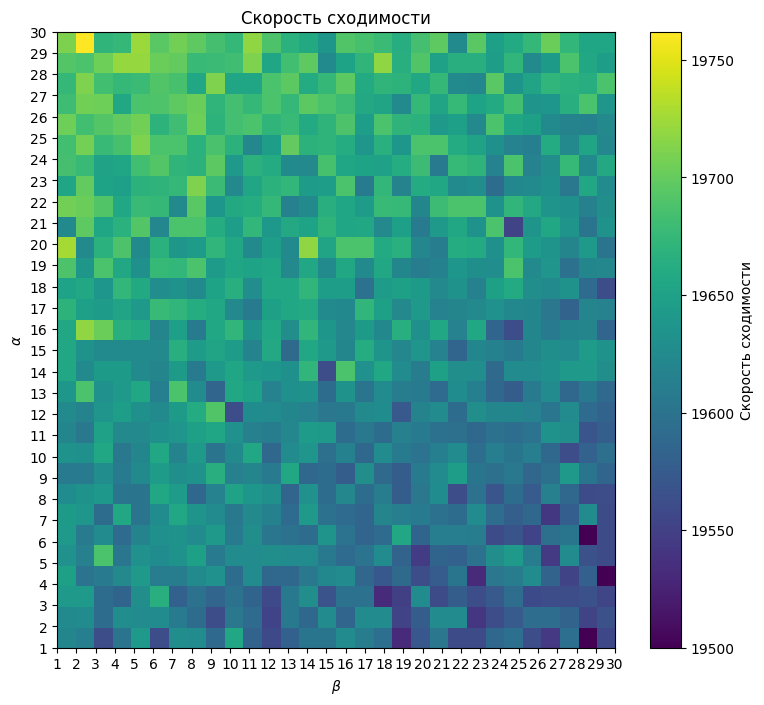

In [10]:
plt.figure(figsize=(9,8))
rng = np.arange(1,31)
heatmap = np.zeros((30,30))
for a in rng:
    for b in rng:
        heatmap[a-1,b-1] = convergence_rate(a,b)
plt.imshow(heatmap, cmap='viridis', aspect='auto', origin='lower', extent=[1,30,1,30])
plt.colorbar(label='Скорость сходимости')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')
plt.title('Скорость сходимости')
plt.xticks(ticks=rng, labels=rng)
plt.yticks(ticks=rng, labels=rng)
plt.show()

*Левый верхний треугольник матрицы более желтый, а правый нижний - более синий (мин. кол-во эл-тов выборки, необходимое для выполнения двух условий, ниже, т.е. сходится быстрее). В общем, априор, "уверенный" в сильно искаженном ответе сходится дольше (по сути, он содержит много ложной информации \ допущений, которые нужно "перекрывать" выборкой). Это левый верхний треугольник. Априор, "уверенный" в близком к истине ответе сойдется быстрее (по сути, он содержит много "спойлеров" - верной информации о распределении). Это правый нижний треугольник. Неуверенные априоры расположены между ними и имеют некоторую промежуточную скорость сходимости.*

__________________
### Задача 4

Пусть $X = (X_1, ..., X_n)$ &mdash; выборка из экспоненциального распределения с параметрами сдвига $\theta_1$ и масштаба $\theta_2$. Плотность распределения имеет вид
    $$p_\theta(x) = \theta_2 e^{\theta_2 (\theta_1 - x)} I\{x \geqslant \theta_1\}.$$

Найдите апостериорное распределений (с учётом константы) если
* используется неинформативный априор (можете взять любой на ваш выбор);
* используется сопряжённое распределение в качестве априорного.

$p(\theta | x) \propto p(\theta) \cdot \prod_{i=1}^{n}{p_\theta(x_i)} = p(\theta) \cdot \theta_2^n e^{n \theta_2 (\theta_1 - \bar{x})} I\{x_{(1)} \geqslant \theta_1\}$  
  
*Через неинформативный априор (взял $p(\theta) \propto 1$):*  
 $p(\theta | x) \propto \theta_2^n e^{n \theta_2 (\theta_1 - \bar{x})} I\{x_{(1)} \geqslant \theta_1\}$*  
   
*Через сопряженный априор:*  
 $p(\theta | x) \propto \theta_2^{n+\alpha-1} e^{n \theta_2 (\theta_1 - \bar{x} - \beta/n)} I\{x_{(1)} \geqslant \theta_1\}$*  
  

----

### Задача 5

Вы пришли в казино и решили сыграть в слот-машину (их еще называют однорукими бандитами). Цель раунда &mdash; получить на барабане автомата выигрышную комбинацию и увеличить свою ставку. Предположим, что у каждой слот-машины существует некоторая фиксированная вероятность выигрыша. Причем разные автоматы могут иметь разные вероятности, которые не известны игроку, то есть вам. Изначально игрок ничего не знает про машины и они для него абсолютно одинаковы.

Можно интерпретировать эту задачу по-другому. Пусть у нас есть несколько дизайнов рекламы или формы регистрации. В каждом случае имеется своя вероятность совершить целевое действие, неизвестная для аналитика. Нашей задачей является максимизировать глобальное совершение целевого действия. То есть хотим понять, какой из дизайнов наиболее удачен, потеряв при этом минимальное число целевых действий из-за невыгодных показов.

Но вернемся в казино. Пусть есть 4 слот-машины. Ниже написаны их истинные вероятности выиграть, а так же функция, которая принимает на вход номер машины и возвращает исход раунда: победа ('W') или проигрыш ('L') 

In [9]:
thetas = [0, 0.10, 0.30, 0.40] # Не подглядывайте!

def play(j):
    """Имитирует слот-машину j: j - индекс слот-машины, вернет W или L"""
    return 'W' if sps.bernoulli(p=thetas[j]).rvs() == 1 else 'L'

В качестве распределения параметра $\theta_j$ будем использовать бета-распределение. Заполните массивы параметров $(\alpha_j, \beta_j)$ в соответствии с условием задачи (априорными знаниями):

*Надо взять неинформативный (равномерный) априор, т.к. все машины кажутся одинаковыми*

In [12]:
a, b = [1, 1, 1, 1], [1, 1, 1, 1]

Ниже написана функция отрисовки распределения. Проверьте, что вы выбрали параметры правильно:

In [8]:
def plot_distr(alphas, betas, grid=np.arange(0, 1, 0.01)):
    """Рисует 4 бета-распределения с заданными параметрами
    :param alphas, betas: параметры распределения, список длины 5
    """
    _, axes = plt.subplots(2, 2, figsize=(10, 5))
    plt.suptitle(r'Распределение вероятности выигрыша', fontsize=14)
    for j, (a, b, ax) in enumerate(zip(alphas, betas, axes.reshape(-1))):
        ax.set_title(f'Слот-машина {j+1}', fontsize=12)
        ax.plot(grid, sps.beta(a, b).pdf(grid), lw=2)
        ax.set_xlabel(r'$\theta$')
    plt.tight_layout()
    plt.show()

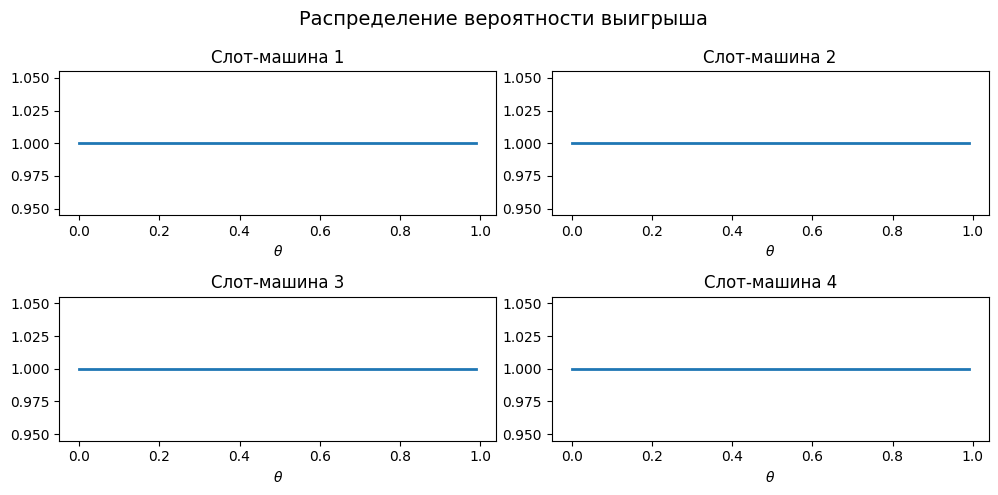

In [14]:
plot_distr(a, b)

*да, всё верно*

Теперь допишите функцию, которая обновляет текущие параметра распределения машины на основе сыгранного раунда:

In [7]:
def update(alphas, betas, j, play):
    """Обновляет параметры распределений выбранной машины
    :param alphas, betas: параметры распределения, списки длины 5
    :param j: номер слот-машины
    :param play: исход раунда, 'W' или 'L' 
    """
    alphas[j], betas[j] = alphas[j] + (play=='W'), betas[j] + (play!='W')

По сути мы хотим неявно проверить множество гипотез $\mathsf{H}_j\colon$ машина $j$ оптимальна, где $j$ &mdash; номер автомата, при этом максимизируя суммарное количество побед.

Игрок хочет выиграть как можно больше и при этом готов сыграть не более 100 раз. Одной из стратегий в данном случае будет сыграть фиксированное и одинаковое число раз на всех автоматах, а затем выбрать тот, у которого наибольшая некоторая оценка вероятности выигрыша. Рассмотрим такой подход. Пусть мы сыграем сначала по 15 раз на каждом из автоматов, а затем оставшиеся 40 на том, который выберем. Посчитайте долю выигрышей в таком подходе:

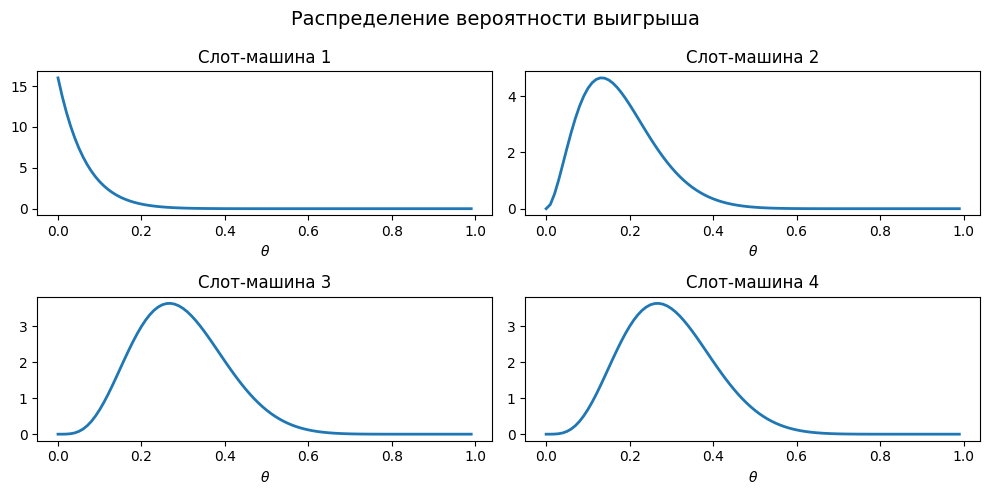

In [16]:
# кэш истории
history = []
for _ in range(15):
    for j in range(4):
        res = play(j)
        update(a, b, j, res)
        history.append(res=='W')
plot_distr(a, b)

Выберите наилучший автомат на основе, например, апостериорного матожидания и сыграйте оставшиеся 60 игр на нём:

In [17]:
best_machine = 4-1

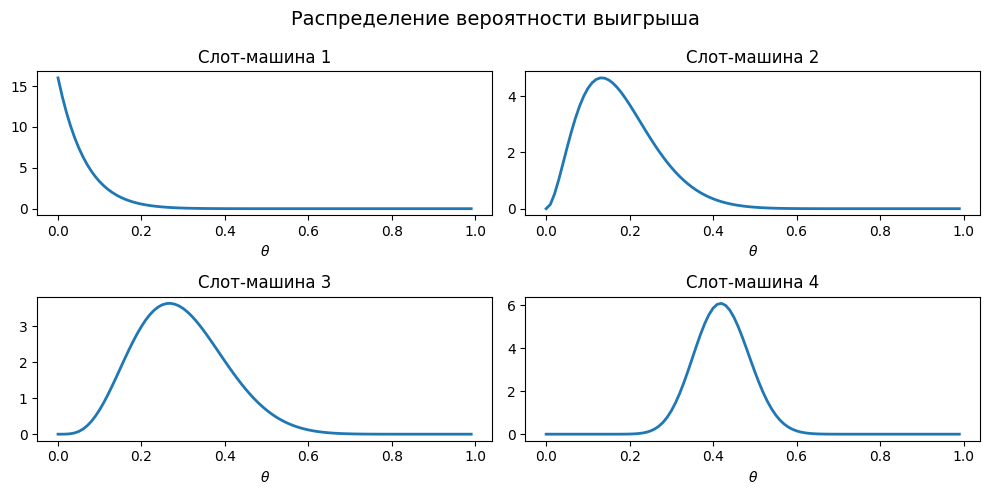

In [18]:
for _ in range(40):
    res = play(best_machine)
    update(a, b, j, res)
    history.append(res=='W')
plot_distr(a, b)

Посчитайте долю побед в такой стратегии:

In [19]:
np.mean(history)

0.29

Заметим, что при такой стратегии много раундов уходит на то, чтоб получить оценку всех параметров. Более того, если оценки вышли неточные, то для дальнейшей игры мы можем выбрать не самый удачный автомат. Чтоб избавиться от этих проблем, рассмотрим другую стратегию. Пусть игрок считает автомат честным и продолжит в него играть, если вероятность выиграть в нем хотя бы $0.3$. Отсюда появляются гипотезы $\mathsf{H}_j^0\colon \theta \geq 0.3 \ \ vs.\ \ \mathsf{H}_j^1\colon \theta < 0.3$, где $j$ &mdash; номер автомата.

Сначала вернитесь к априорным параметрам:

In [20]:
a, b = [1, 1, 1, 1], [1, 1, 1, 1]

Допишите функцию, вычисляющую байесовские факторы для гипотез выше:

In [6]:
def testing(alphas, betas):
    """ Вычисляет 4 баесовских фактора. alphas, betas - параметры распределения, списки длины 4. Вернет список длины 4"""
    return [sps.beta(alphas[i], betas[i]).sf(0.3) / sps.beta(alphas[i], betas[i]).cdf(0.3) for i in range(4)]

Дальше игрок выбирает автомат $j$ с наибольшим байесовским фактором в пользу  $\mathsf{H}_j^0$ и играет в него, продолжая пересчитывать параметры распределения. Если вдруг байесовский фактор $\beta_j$ стал меньше другого $\beta_k$, то игрок переходит к автомату $k$. Допишите функции, моделирующие поведение игрока:

In [5]:
def choose(factors):
    """Выбирает автомат для следующего раунда. factors - байесовские факторы автоматов. Вернет номер автомата"""
    return np.array(factors).argmax()

In [4]:
def imitate_game(alphas, betas, rounds_count=100):
    """ Имитирует поведение игрока
    :params alphas, betas: параметры априорных распределений
    :params rounds_count: количество сыгранных раундов
    :returns: историю раундов ('W'/'L')
    """
    history = []
    for _ in range(rounds_count):
        best_machine = choose(testing(alphas, betas))
        res = play(best_machine)
        update(a, b, best_machine, res)
        history.append(res=='W')
    return history

Проведите 100 раундов игры по новой стратегии, визуализируйте полученные апостериорные распределения и посчитайте долю побед:

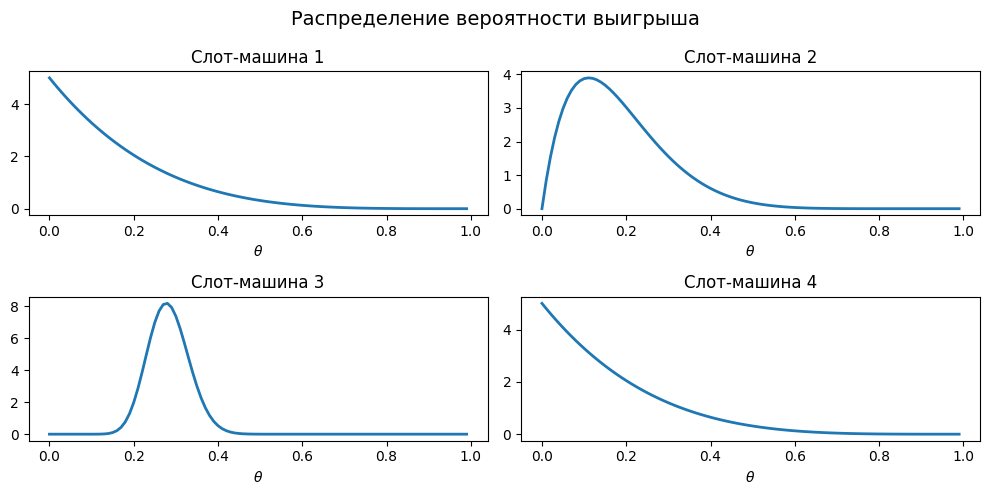

In [24]:
history = imitate_game(a, b)
plot_distr(a, b)

In [25]:
np.mean(history)

0.24

Однако в данной стратегии все еще возможен выбор не самой удачной машины. Почему? Предложите и реализуйте третью стратегию, выбор в которой будет основан на байесовских факторах:

Описание стратегии:

*Не понял этот момент( у нас стратегия уже была основана на байес. факторах*  
*Возможно, опечатка?*

In [2]:
def imitate_game_bayes(alphas, betas, rounds_count=100):
    """ Имитирует поведение игрока
    :params alphas, betas: параметры априорных распределений
    :params rounds_count: количество сыгранных раундов
    :returns: историю раундов ('W'/'L')
    """
    return imitate_game(alphas, betas, rounds_count)

Проведите 100 раундов игры по новой стратегии, визуализируйте полученные апостериорные распределения и посчитайте долю побед:

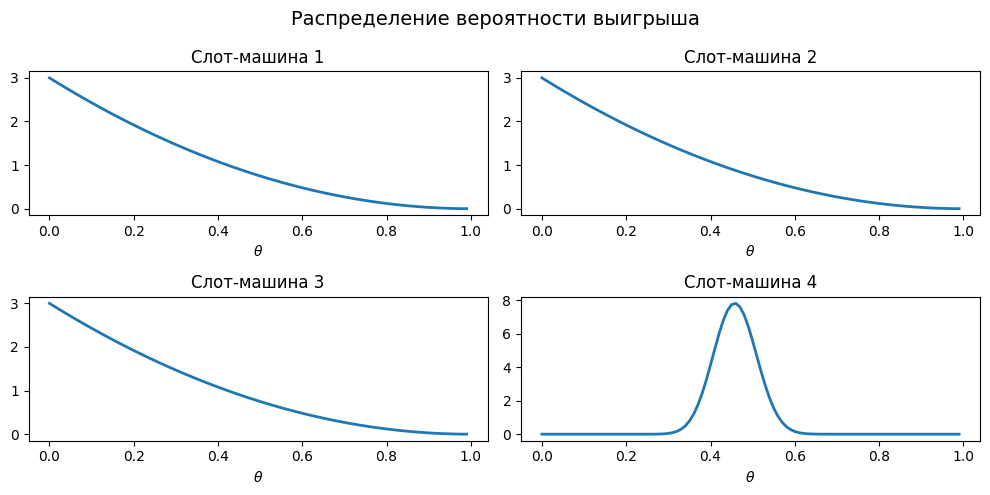

In [10]:
a, b = [1, 1, 1, 1], [1, 1, 1, 1]
history = imitate_game_bayes(a, b)
plot_distr(a, b)

In [11]:
np.mean(history)

0.43

---

### Задача 6

Рассмотрим выборку из экспоненциального распределения и гипотезы $\mathsf{H}_0\colon \theta < 0.5 \ vs\ \mathsf{H}_1\colon \theta \geq 0.5$

In [12]:
sample = np.array([0.91931224,2.16737761,0.05347562,1.09251725,2.56295497,8.15872914,0.33232659,0.4751825,3.00461356, 0.87672092,0.03906482])

Подберите сопряжённое априорное так, чтоб априорные вероятности гипотез были примерно равны:

In [13]:
a_prior, b_prior = 10, 5.3
round(sps.gamma(a=b_prior, scale=1/a_prior).cdf(0.5), 4)

0.5053

Расчитайте байесовский фактор в пользу $\mathsf{H}_0$:

In [14]:
def factor(a_prior, b_prior, r=4):
    a_post, b_post = a_prior+sample.sum(), b_prior+len(sample)
    return round(sps.gamma(b_post, scale=1/a_post).cdf(0.5) / sps.gamma(b_post, scale=1/a_post).sf(0.5), r)

factor(a_prior, b_prior)

0.629

Что можно сказать про гипотезы?

**Ответ:** *H1 вероятнее*

Теперь рассмотрим априорное распределение, в котором $\mathsf{H}_0$ более вероятно, чем $\mathsf{H}_1$ примерно в 2 раза:

In [15]:
a_prior, b_prior = 1, 0.5

Проведите проверку гипотез:

In [16]:
factor(a_prior, b_prior)

0.6653

Сравните полученные байесовские факторы при различных априорных распределениях. Почему возникает такой эффект?

**Ответ:** *фактор немного поменялся, но вывод по гипотезам такой же. Мы в обоих случаях учитываем выборку, поэтому так или иначе корректируем представление о данных при проверке гипотезы - отсюда и эффект*

Попробуем поменять априорные вероятности. Теперь $\mathsf{H}_0$ менее вероятно примерно в два раза:

In [17]:
a_prior, b_prior = 4, 3

Проведите проверку гипотез:

In [18]:
factor(a_prior, b_prior)

0.4323

Что в итоге можно сказать про гипотезы?

**Вывод:** *выборка подтвердила априорные предположения о распределении. Отвергаем Н0 в пользу Н1*